# Lecture 9 - Motor Control
### Introduction to modeling and simulation of human movement
https://github.com/BMClab/bmc/blob/master/courses/ModSim2018.md

* Tasks (for Lecture 9):

Implement the Kelvin model. Set the parameters of the model so as to the response of the model is similar to the shown in the Figure 3(a) from VAN LOOCKE, M.; LYONS, C. G.; SIMMS, C. K. Viscoelastic properties of passive skeletal muscle in compression: Stress-relaxation behaviour and constitutive modelling. Journal of Biomechanics, v. 41, n. 7, p. 1555–1566, 2008. 

In [1]:
import numpy as np
#import pandas as pd
#import pylab as pl
import matplotlib.pyplot as plt
import math

%matplotlib notebook

In [2]:
dt = 5e-2 # samples/s (time resolution)
t = np.arange(0,360,dt)
f = np.empty (t.shape)

# -- Parameters --
ks = 150 #kPa
kp = 350 #kPa
b = 800
l0 = 10e-3 #m
l = 9.99e-3 #m

# Samples were compressed up to 30% strain at rates of 0.5% s^-1
rate = 0.5e-2#/dt # m/ sample
#l = rate*l0 

f[0] = 0

## Kelvin model

In [3]:
x1 = f[0] - (kp+ks)*l

In [4]:
for i in range (1,len(t)):
    if t[i]>=60:
        l = 7e-3
    #Equation    
    dx1dt = -(ks/b)*x1 -((ks**2)/b)*l -((ks*kp)/b)*l0
    x1 = x1 + dt*dx1dt
    f[i] = x1 + (kp+ks)*l

## Plot 

<IPython.core.display.Javascript object>


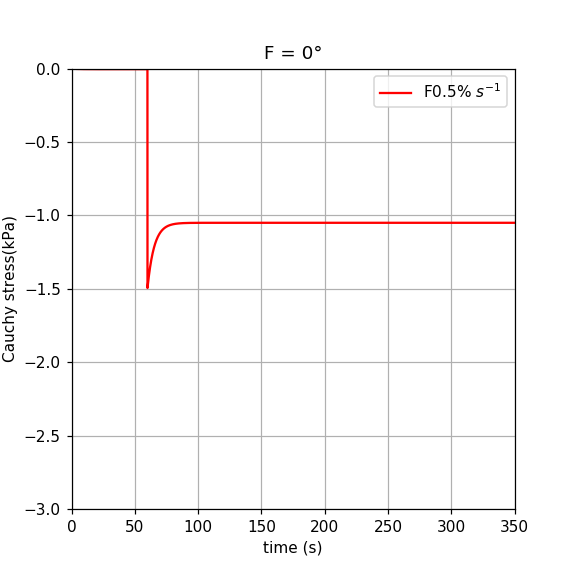

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5.2,5.2), sharex=True)

ax.plot(t,f,c='red',label='F0.5% $s^{-1}$')
plt.xlim([0,350])
plt.ylim([-3,0])
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Cauchy stress(kPa)')
plt.title('F = 0°')

ax.legend()